# Football

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import Data and Explore

In [2]:
fb = pd.read_csv('results.csv')

In [3]:
fb.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
date          41586 non-null object
home_team     41586 non-null object
away_team     41586 non-null object
home_score    41586 non-null int64
away_score    41586 non-null int64
tournament    41586 non-null object
city          41586 non-null object
country       41586 non-null object
neutral       41586 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [5]:
# Delete Missing Value Entries (if any)
fb = fb.dropna()

### Questions/Tasks

In [6]:
# How many tuples are there in the dataset? (rows)
index = fb.index
number_of_tuples = len(index)
number_of_tuples

41586

In [7]:
# How many tournaments are there in the dataset?
fb['tournament'].nunique()

112

In [8]:
# Convert the column date to timestamps
fb['date'] = pd.to_datetime(fb['date'])

In [9]:
# Find out how many matches in the dataset were played in 2018.
fb['date'].dt.year
len(fb[fb['date'].dt.year==2018])

905

In [10]:
# Calculate how many times the home team won, lost or had a draw.
conditions = [(fb['home_score'] > fb['away_score']),
              (fb['home_score'] < fb['away_score']),
              (fb['home_score'] == fb['away_score'])]
values =['win','loss','draw']

fb['home_team_outcome'] = np.select(conditions,values)
fb['home_team_outcome'].value_counts()

win     20234
loss    11774
draw     9578
Name: home_team_outcome, dtype: int64

([<matplotlib.patches.Wedge at 0x208d49a36d8>,
 [Text(0.046438445500702946, 1.0990193222957814, 'Win'),
  Text(-0.762420761060101, -0.7929152433296617, 'Loss'),
  Text(0.8243952802938663, -0.72826672437315, 'Draw')],
 [Text(0.025330061182201605, 0.599465084888608, '48.7%'),
  Text(-0.41586586966914596, -0.4324992236343609, '28.3%'),
  Text(0.44967015288756346, -0.3972363951126272, '23.0%')])

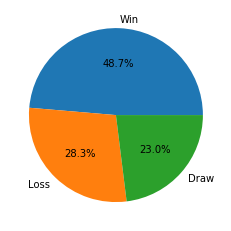

In [11]:
#Plot the numbers extracted in a pie chart.
X = fb['home_team_outcome'].value_counts()
labels = 'Win','Loss','Draw'
plt.pie(X,labels=labels,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x208d4a17dd8>,
 [Text(-0.7845162444894376, 0.7710604789069333, 'False'),
  Text(0.7845162083934902, -0.7710605156327887, 'True')],
 [Text(-0.4279179515396932, 0.4205784430401454, '75.3%'),
  Text(0.42791793185099464, -0.42057846307243013, '24.7%')])

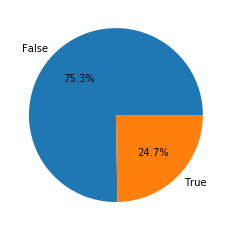

In [12]:
#Plot the neutral column as a pie chart.
X = fb['neutral'].value_counts()
labels = 'False','True'
plt.pie(X,labels=labels,autopct='%1.1f%%')

In [13]:
#How many unique teams are there in the dataset?
fb['home_team'].append(fb['away_team']).nunique()

312